C:\Users\piras\AppData\Local\Temp\ipykernel_59056\2605031783.py:60: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


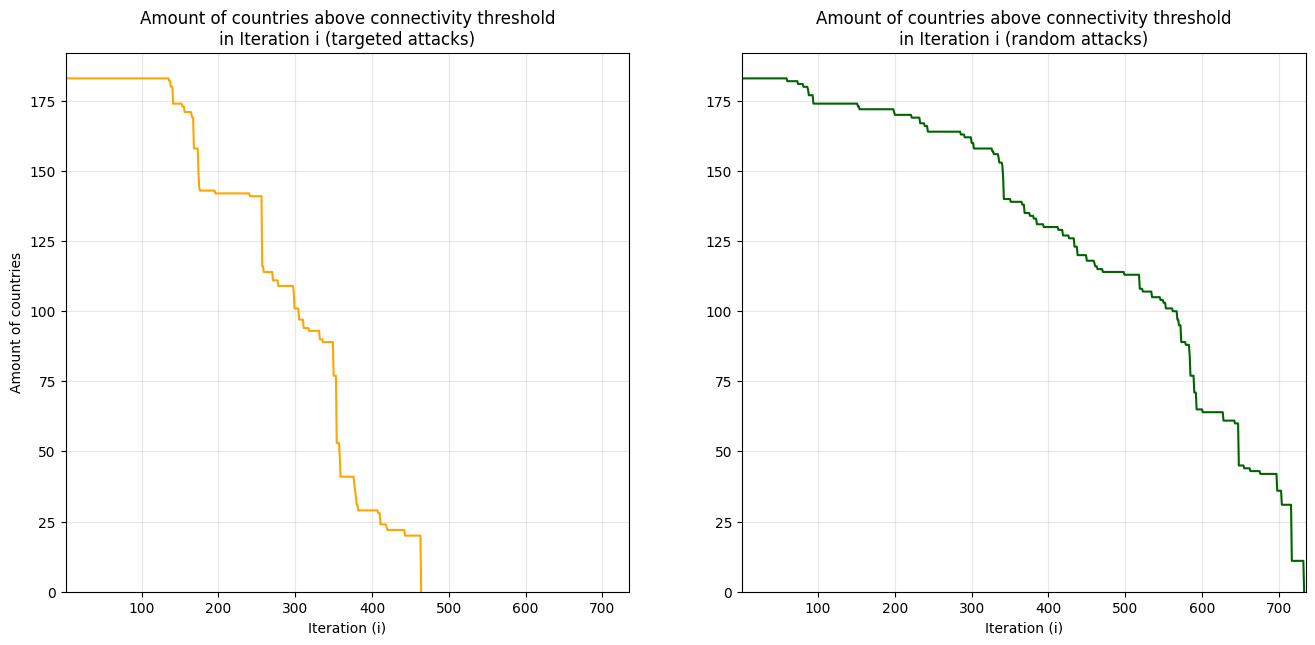

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

_DATAEXTR_DIR = "../../dataExtracted"

G = nx.read_graphml(str(_DATAEXTR_DIR + "/THE_MERGED_GRAPH.graphml"))

def metanodes(G, meta_key='meta'):
    return {n : d['country'] for n, d in G.nodes(data=True) if d.get(meta_key, False)}

def printResults(mode):

    # load data
    # --------------
    df_targeted = pd.read_csv(str(_DATAEXTR_DIR + f"/avg_{mode}_targeted.csv"))
    df_rel_targeted = (df_targeted / df_targeted.iloc[0]).copy()

    df_random = pd.read_csv(str(_DATAEXTR_DIR + f"/avg_{mode}_random.csv"))
    df_rel_random = (df_random / df_random.iloc[0]).copy()
    # --------------

    # plot amount of countries still above threshold
    # --------------
    countries_count_targeted = []
    for row in df_rel_targeted.iterrows():
        countries_count_targeted.append(sum(np.where(row[1] >= 0.5, 1, 0)))

    countries_count_random = []
    for row in df_rel_random.iterrows():
        countries_count_random.append(sum(np.where(row[1] >= 0.5, 1, 0)))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(16)

    ax1.plot(range(1, len(df_targeted)+1), countries_count_targeted, c= 'orange')
    ax2.plot(range(1, len(df_random)+1), countries_count_random, c= 'darkgreen')

    ax1.grid(alpha= 0.3)
    ax2.grid(alpha= 0.3)

    ax1.set_title(f"Amount of countries above {mode} threshold\nin Iteration i (targeted attacks)")
    ax2.set_title(f"Amount of countries above {mode} threshold\nin Iteration i (random attacks)")
    
    ax1.set_xlabel("Iteration (i)")
    ax2.set_xlabel("Iteration (i)")

    ax1.set_ylabel("Amount of countries")

    ax1.set_xlim(1, max(len(df_targeted)+2, len(df_random)+2))
    ax2.set_xlim(1, max(len(df_targeted)+2, len(df_random)+2))

    ax1.set_ylim(bottom= 0)
    ax2.set_ylim(bottom= 0)

    fig.show()
    # --------------

    # Print first and last countries to drop out  # USE LOGFILE !!!
    # --------------
    meta_dict = metanodes(G)





printResults("connectivity")